<a href="https://colab.research.google.com/github/kumareshvj/Basic_codingf_for_ML/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error



In [5]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#importing dataset
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/50_Startups.csv')


In [7]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
#data describe about the dataset
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [11]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [20]:
df.shape

(50, 5)

Text(0, 0.5, 'Profit')

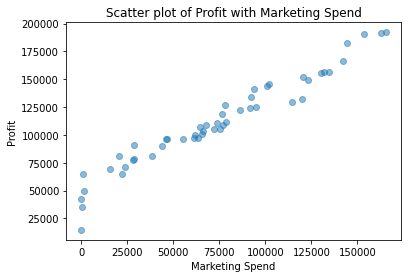

In [23]:
plt.scatter(df['R&D Spend'],df['Profit'], alpha = 0.5)
plt.title('Scatter plot of Profit with Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()


Text(0, 0.5, 'Profit')

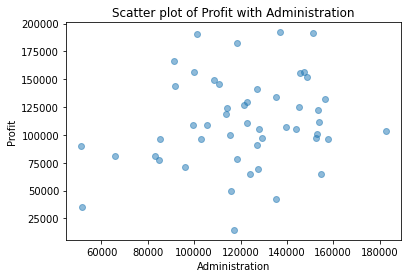

In [25]:
plt.scatter(df['Administration'],df['Profit'],alpha = .5)
plt.title('Scatter plot of Profit with Administration')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

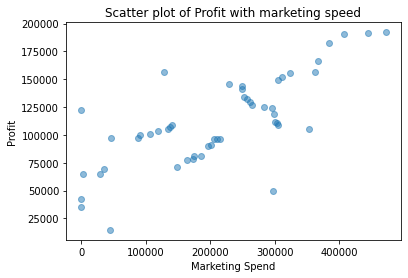

In [27]:
plt.scatter(df['Marketing Spend'],df['Profit'],alpha=0.5)
plt.title('Scatter plot of Profit with marketing speed')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

Text(0, 0.5, 'Profit')

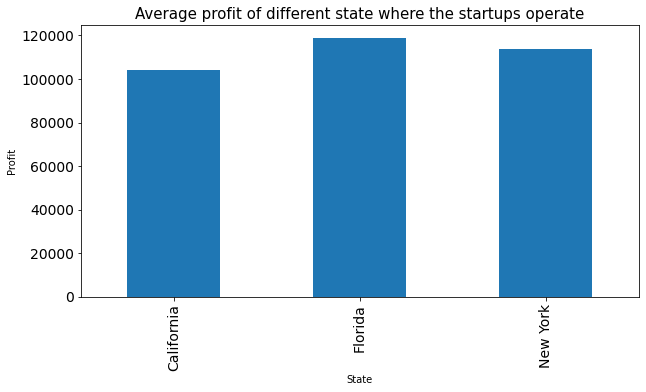

In [28]:
#grouping the state with respect to profit mean
ax = df.groupby('State')['Profit'].mean().plot.bar(figsize = (10,5),fontsize = 14)

ax.set_title('Average profit of different state where the startups operate',fontsize = 15)

ax.set_xlabel('State',fontsize = 10)
ax.set_ylabel('Profit',fontsize = 10)

In [29]:
df.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [31]:
# Create dummy variables for the catgeorical variable state
df['New_York_state'] = np.where(df['State'] == 'New York',1,0)
df['California_state'] = np.where(df['State']=='California',1,0)
df['Florida_state'] = np.where(df['State'] == 'States',1,0)

In [33]:
# Drop the original column state from the dataframe
df.drop(columns= ['State'],axis = 1,inplace = True)

In [34]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,New_York_state,California_state,Florida_state
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,0
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,0


In [35]:
dependent_variable = 'Profit'

In [38]:
#creating the list of independent variable
independent_variable = list(set(df.columns.tolist()) - {dependent_variable})

In [39]:
independent_variable

['New_York_state',
 'Administration',
 'California_state',
 'Marketing Spend',
 'R&D Spend',
 'Florida_state']

In [40]:
# create the data of independent variables
X = df[independent_variable].values
# Create the dependent variables
y = df[dependent_variable].values

In [41]:
df[independent_variable]

,New_York_state,Administration,California_state,Marketing Spend,R&D Spend,Florida_state
0,1,136897.80,0,471784.10,165349.20,0
1,0,151377.59,1,443898.53,162597.70,0
2,0,101145.55,0,407934.54,153441.51,0
3,1,118671.85,0,383199.62,144372.41,0
4,0,91391.77,0,366168.42,142107.34,0
5,1,99814.71,0,362861.36,131876.90,0
6,0,147198.87,1,127716.82,134615.46,0
7,0,145530.06,0,323876.68,130298.13,0
8,1,148718.95,0,311613.29,120542.52,0
9,0,108679.17,1,304981.62,123334.88,0


In [42]:
#Splitting the dataset into the training set and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [43]:
X_train[:10]

array([[0.0000000e+00, 1.0305749e+05, 0.0000000e+00, 2.1463481e+05,
        5.5493950e+04, 0.0000000e+00],
       [1.0000000e+00, 8.5047440e+04, 0.0000000e+00, 2.0551764e+05,
        4.6014020e+04, 0.0000000e+00],
       [0.0000000e+00, 1.4413598e+05, 0.0000000e+00, 1.3405007e+05,
        7.5328870e+04, 0.0000000e+00],
       [0.0000000e+00, 1.5769392e+05, 1.0000000e+00, 2.1079767e+05,
        4.6426070e+04, 0.0000000e+00],
       [0.0000000e+00, 1.1417579e+05, 0.0000000e+00, 2.9491957e+05,
        9.1749160e+04, 0.0000000e+00],
       [0.0000000e+00, 1.4553006e+05, 0.0000000e+00, 3.2387668e+05,
        1.3029813e+05, 0.0000000e+00],
       [0.0000000e+00, 1.5654742e+05, 0.0000000e+00, 2.5651292e+05,
        1.1994324e+05, 0.0000000e+00],
       [1.0000000e+00, 1.2415304e+05, 0.0000000e+00, 1.9039300e+03,
        1.0002300e+03, 0.0000000e+00],
       [1.0000000e+00, 5.1743150e+04, 0.0000000e+00, 0.0000000e+00,
        5.4205000e+02, 0.0000000e+00],
       [1.0000000e+00, 1.5303206e+05,

In [44]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
#Fitting Multiple linear regression to the training set
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [47]:
regressor.intercept_

43281.30887697068

In [48]:
regressor.coef_

array([  1658.65321258,   3499.27567382,    959.28416006,  17272.02810316,
       127892.18154461,      0.        ])

In [49]:
y_pred_train = regressor.predict(X_train)

In [50]:
y_train

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])

In [51]:
# Predicting the test set results
y_pred = regressor.predict(X_test)

In [59]:
# Predicated profit on test results
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [60]:
# actual profit on test results
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [52]:
#Test performance
math.sqrt(mean_squared_error(y_test,y_pred))

83502864.03257726

In [56]:
#Train performance
math.sqrt(mean_squared_error(y_train,y_pred_train))

9031.666612578969

In [57]:
r2_score(y_train,y_pred_train)

0.9501847627493607

In [58]:
r2_score(y_test,y_pred)

0.9347068473282426